In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
from scipy.stats import linregress
import json


In [2]:
health_wrob_df=pd.read_csv("../resources/VAERSDATA1 (3).csv")
health_wrob_df.head()
max_age=health_wrob_df["AGE_YRS"].max()
print(max_age)

109


In [3]:
health_wrob_state = health_wrob_df.sort_values(by=["STATE","AGE_YRS"], ascending=[True,True])
health_wrob_state=health_wrob_state[health_wrob_state["AGE_YRS"]>=10]
health_wrob_state.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
17459,1906451,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,"Pork, Peanuts"
17460,1906459,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN
17461,1906495,11/29/2021,AK,10,M,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN
17767,1944375,12/13/2021,AK,10,F,NaN,NaN,NaN,11/24/2021,11/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN
17768,1944576,12/13/2021,AK,10,M,NaN,NaN,NaN,11/26/2021,11/26/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN


In [4]:
# creating bins
bins = list(range(10, 111, 10))
labels=[f"{i}-{i+9}" for i in range(10,110,10)]
health_wrob_state["Age_Group"]=pd.cut(health_wrob_df["AGE_YRS"],bins=bins,labels=labels,right=False)
health_wrob_state.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES,Age_Group
17459,1906451,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,"Pork, Peanuts",10-19
17460,1906459,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19
17461,1906495,11/29/2021,AK,10,M,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19
17767,1944375,12/13/2021,AK,10,F,NaN,NaN,NaN,11/24/2021,11/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN,10-19
17768,1944576,12/13/2021,AK,10,M,NaN,NaN,NaN,11/26/2021,11/26/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN,10-19


In [5]:
print(health_wrob_state.columns.tolist())

['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'V_ADMINBY', 'VAX_MANU', 'HISTORY', 'ALLERGIES', 'Age_Group']


In [6]:
# health_wrob_age=health_wrob_state.sort_values(by=["Age_Group"],ascending=True)
# health_wrob_age.drop(columns=["Age Group"], inplace=True)
# health_wrob_age.head()

In [7]:
removed_states=["GU","VI","AS","MP","XB","FM","MH","QM","PW","QW","XV","XL", "Ca"]
states_only=health_wrob_state[~health_wrob_state["STATE"].isin(removed_states)]

In [8]:
state_counts = states_only["STATE"].value_counts()
total_count= states_only["VAERS_ID"].count()
print(state_counts)
print(total_count)

STATE
CA    86225
TX    46958
NY    44953
FL    44930
MI    34663
PA    29114
IN    27386
IL    25977
OH    25763
NJ    23413
CO    22277
WA    21800
NC    20624
MN    20527
MA    20518
VA    19838
GA    18989
AZ    18307
MD    16281
WI    15346
TN    13211
MO    13085
KY    12875
OR    11643
CT    10809
OK     8432
SC     8418
AL     7261
IA     6599
KS     6136
LA     6066
NV     5812
UT     5690
AR     5580
PR     5134
NM     5036
NH     4346
ME     4307
NE     4278
ID     4259
MS     3792
MT     3472
WV     3280
HI     3211
RI     2878
AK     2446
VT     2404
DE     2320
DC     2235
SD     1886
ND     1783
WY     1150
Name: count, dtype: int64
879037


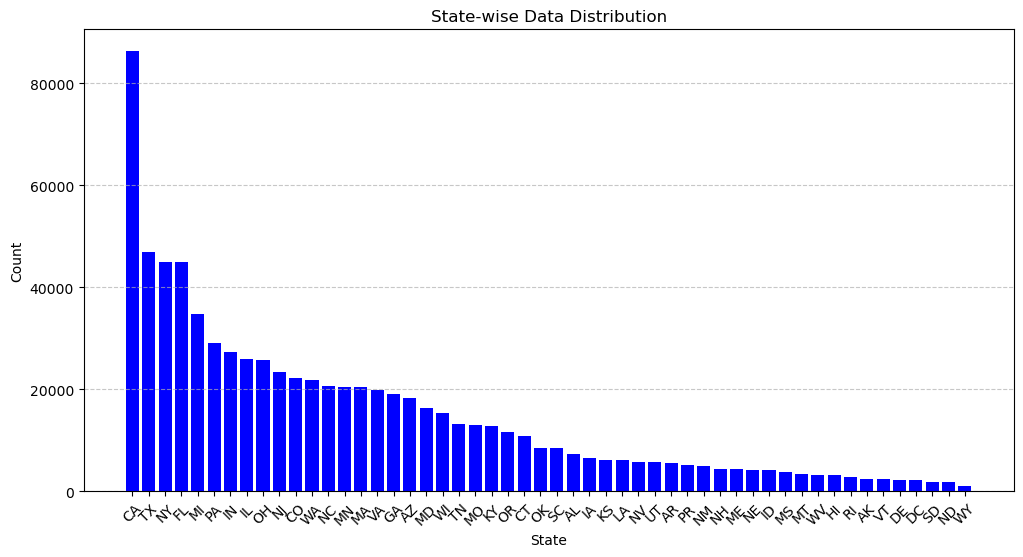

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values, color="blue")

# Formatting the chart
plt.title("State-wise Data Distribution")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()